In [74]:
import numpy as np
import pandas as pd
import collections
import string, sys, os, re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from IPython.display import Image
from functools import reduce
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [75]:
df_ms = pd.read_csv(r"../data/msv7.csv")
df_hs = pd.read_csv(r"../data/hsv7.csv")
df_hs.head()

,name,conduct,age,gender,nationality,pob,tutor/makeup,grade,admission,guardian,time_with_parents,communication_with_parents,reward_for_achievements,parent_understanding,transport_type,residence,travel time,birth_order,exercice,previous_school,mother_tongue,curriculum,sleeping time_in_pm,parenting_style,trauma,type,quality,literature,eng,maths,physics,chemistry,biology,geography,history,civics,amharic,ict,ent-ship,hpe,gpa,matrik
0,abem kibru worku,b,15,m,ethiopian,ethiopia,no,9,paid,both,little,agree,agree,somehow agree,public,zenebework,30-60,middle child,2.0,passion,eth-lang,no,7.0,authoritative,0.0,phy,3.25,76.75,93.67,70.56,72.76,44.70,66.37,73.02,72.19,87.43,96.58,71.31,76.26,64.90,74.3,72.6
1,amanuel demeke hailu,a,14,m,ethiopian,ethiopia,no,9,paid,both,little,agree,strongly agree,somehow agree,private,zenebework,15-,middle child,3.0,gibson,eth-lang,no,7.5,authoritative,0.0,none,3.50,77.52,94.33,62.57,70.85,77.20,69.77,74.17,81.65,76.48,84.84,80.42,77.16,86.00,77.9,75.9
2,ananya girma tegegn,a,14,m,ethiopian,ethiopia,no,9,scholarship,both,a lot,strongly agree,strongly agree,strongly agree,public,cmc,30-60,first child,3.0,dr bekele,eth-lang,no,7.5,authoritative,0.0,none,4.50,88.27,91.67,97.16,85.77,97.90,96.27,95.33,83.40,93.05,97.18,94.27,88.76,89.50,92.2,92.6
3,blen amare mesfin,a,15,f,ethiopian,ethiopia,no,9,paid,both,a lot,strongly agree,strongly agree,strongly agree,service,megenagna,30-60,last child,3.0,magic carpet,eth-lang,no,8.0,permissive,1.0,none,4.50,73.81,91.00,72.55,67.95,76.70,79.35,78.50,75.03,83.81,96.15,88.55,83.16,84.00,80.8,78.1
4,dagmawi misganaw bimerew,a,14,m,ethiopian,ethiopia,yes,9,paid,both,a lot,agree,agree,agree,private,bole bulbula,30-60,middle child,0.0,school of nations,eth-lang,no,8.5,authoritative,0.0,none,3.75,91.77,97.67,90.60,76.69,71.97,84.72,85.04,84.30,88.48,94.10,92.66,85.66,93.25,87.5,84.9


In [76]:
ms_filter = df_ms[['residence','previous_school']]
hs_filter = df_hs[['residence','previous_school']]

In [77]:
frames = [ms_filter, hs_filter]
df = pd.concat(frames)

In [78]:
df.residence.value_counts()

jemo             35
sarbet           24
lebu             23
kality           13
german square    13
                 ..
gofa gabriel      1
kera              1
welete            1
sululta           1
sefereselam       1
Name: residence, Length: 66, dtype: int64

In [79]:
# unique value counts
counts_df = df['residence'].value_counts().rename_axis('name').reset_index(name='count')
counts_df



,name,count
0,jemo,35
1,sarbet,24
2,lebu,23
3,kality,13
4,german square,13
...,...,...
61,gofa gabriel,1
62,kera,1
63,welete,1
64,sululta,1


In [80]:
repeated_names = counts_df.query('count > 1').name.to_list()

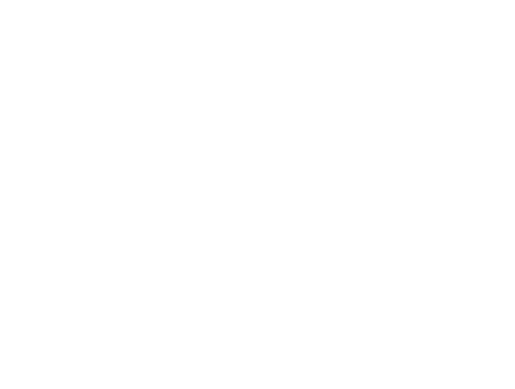

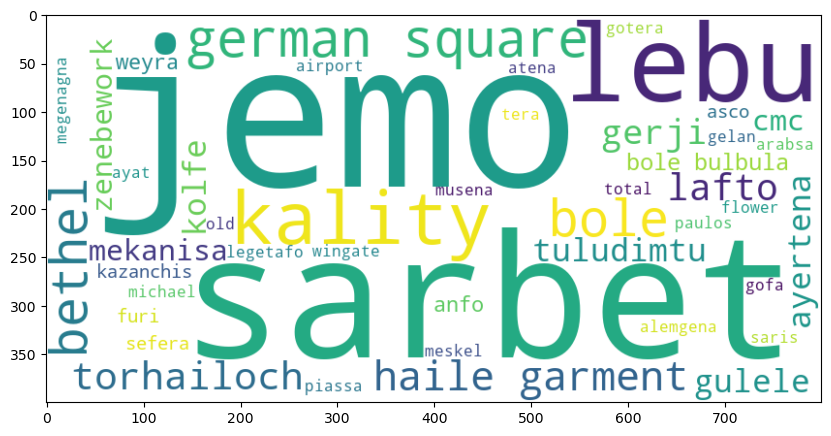

In [81]:

text = " ".join(name for name in df[df.residence.isin(repeated_names)].residence)

# generate a word cloud image
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# display the word cloud
plt.axis("off")
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()



In [82]:
# unique value counts
counts_df = df['previous_school'].value_counts().rename_axis('name').reset_index(name='count')
counts_df

,name,count
0,gibson,28
1,intellectual,28
2,jemo 2,17
3,neps,15
4,school of nations,14
...,...,...
95,bingham,1
96,emmanuel,1
97,netsanet chora,1
98,akaki kality menbere,1


In [83]:
repeated_names = counts_df.query('count > 1').name.to_list()

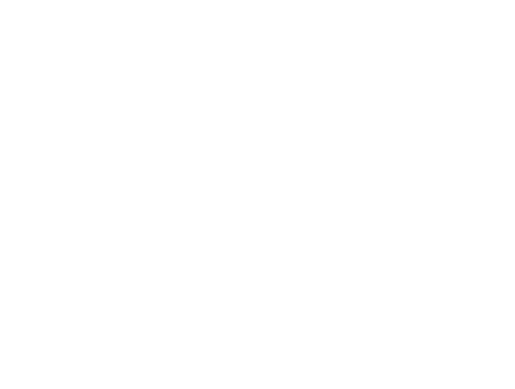

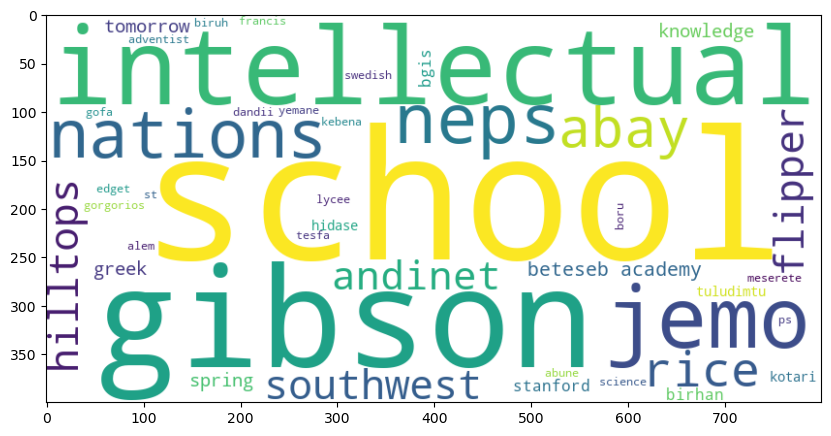

In [84]:

text = " ".join(name for name in df[df.previous_school.isin(repeated_names)].previous_school)

# generate a word cloud image
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# display the word cloud
plt.axis("off")
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()